## Docs

> * [Wikipedia: accuracy and precision](https://en.wikipedia.org/wiki/Accuracy_and_precision)

> * [Cross-entropy for Machine Learning](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)


## Update Scikit-Learn package

In [81]:
!pip install --upgrade scikit-learn
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Libraries

In [196]:
# Data structures
import numpy as np
import pandas as pd

# Algorithms and Estimators
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# Scikit-Learn example datasets
from sklearn.datasets import load_breast_cancer

# Scikit-Learn Utilities
from sklearn.model_selection import train_test_split
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Scikit-Lean Estimators
from scikeras.wrappers import KerasClassifier

# Scikit-Learn Accuracy Metrics
from sklearn.metrics import accuracy_score, precision_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Keras parameters
# from keras.metrics import BinaryAccuracy, BinaryCrossentropy, Accuracy
# from keras.initializers import HeNormal, GlorotNormal
# from keras.losses import BinaryCrossentropy, CategoricalCrossentropy
# from keras.activations import sigmoid, softmax, relu
from keras.optimizers import Adam

# Scikit-Learn Metrics-Display
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Others
from statistics import mean

## Load `breast_cancer` dataset

> * [load_breast_cancer scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

> * [UCI Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

> * [Data Set Characteristics scikit-learn.org](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset)

> * UCI ftp Breast Cancer Wisconsin
>> * `ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/`

***Summary:***

Load and return the breast cancer wisconsin dataset (classification).

The breast cancer dataset is a classic and very easy binary classification dataset.

**Task**
> * Classification

**Input features**
> * 30 numeric (real) variables

**Output labels**
> * 2 binary classes: malignant, benign

**Missing values**
> * None

***Data Set Information:***

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link]

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

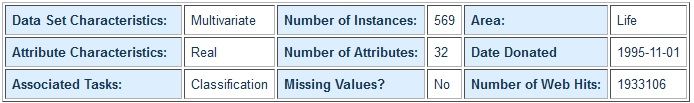

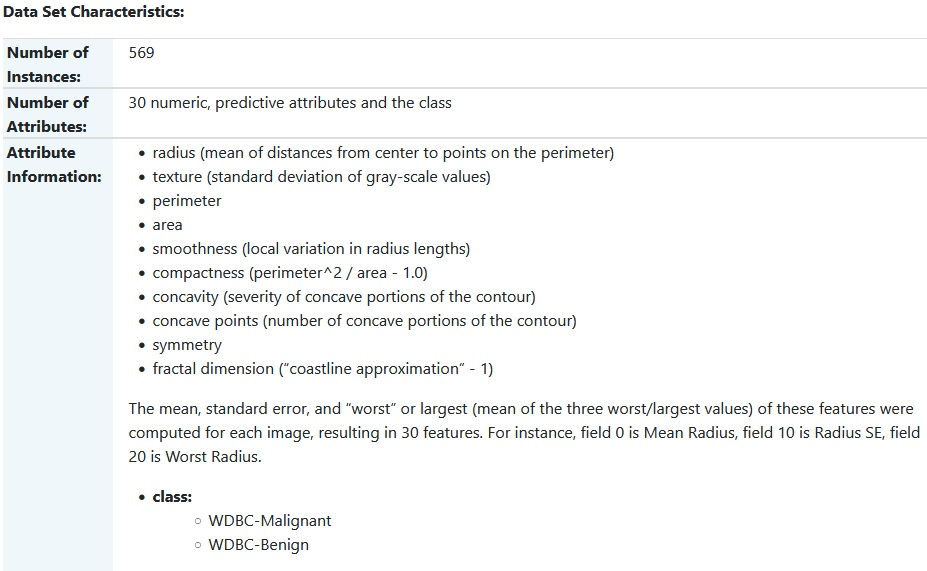

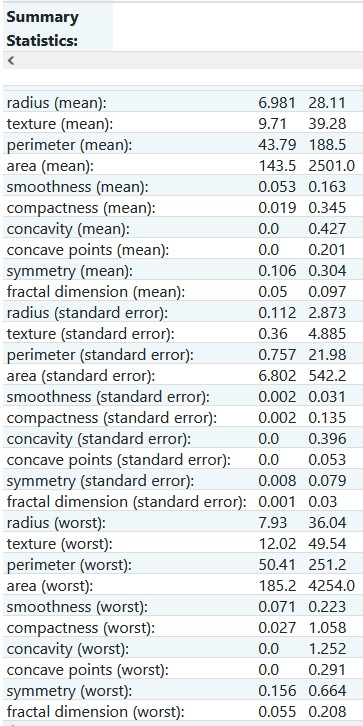

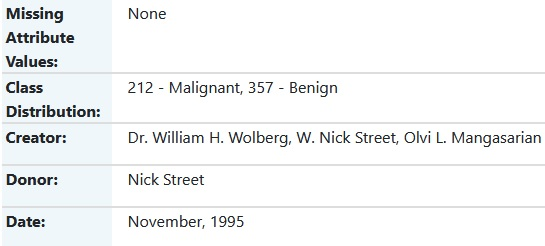

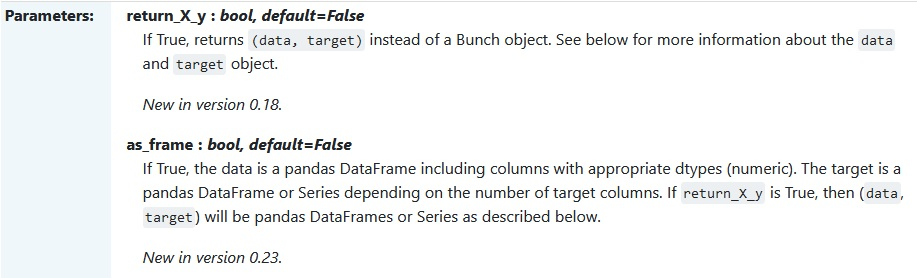

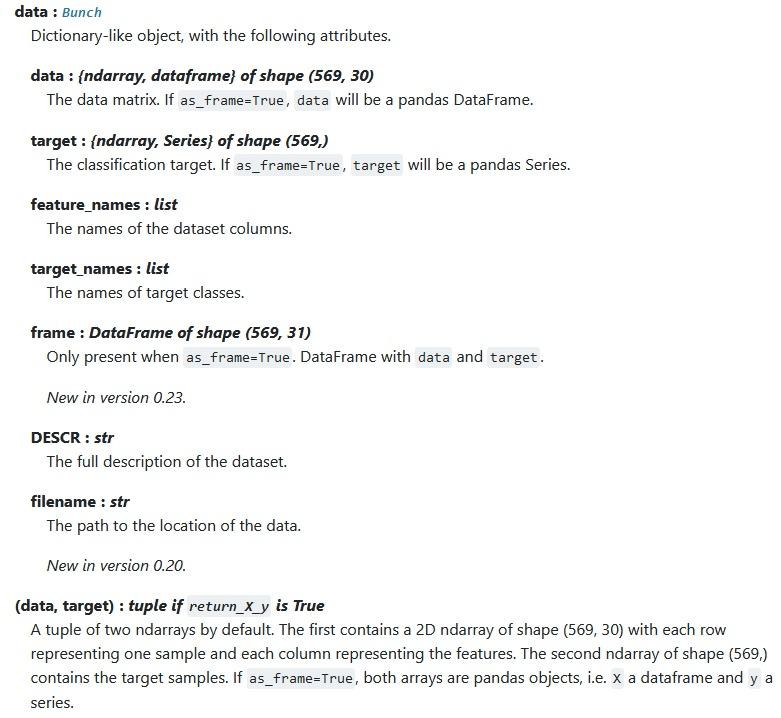

In [23]:
# este dataset viene 'empaquetado'
data = load_breast_cancer()

## Displaying dataset information

In [24]:
# Number of records
print('Number of records', len(data['data']))
print('Number of features', len(data['data'][0]))
# 'target'
print('Number of target records', len(data['target']))
# 'feature-names'
print('Number of features', len(data['feature_names']))

Number of records 569
Number of features 30
Number of target records 569
Number of features 30


In [25]:
# Dataset description
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Turning dataset into `Pandas DataFrame`

In [26]:
df = pd.DataFrame(
    np.c_[data['data'], data['target']],
    columns = np.append(data['feature_names'], ['target'])
)

## Dataset features and target list

In [27]:
feature_names = data['feature_names']
target = 'target'
print(feature_names)
print(target)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
target


In [28]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


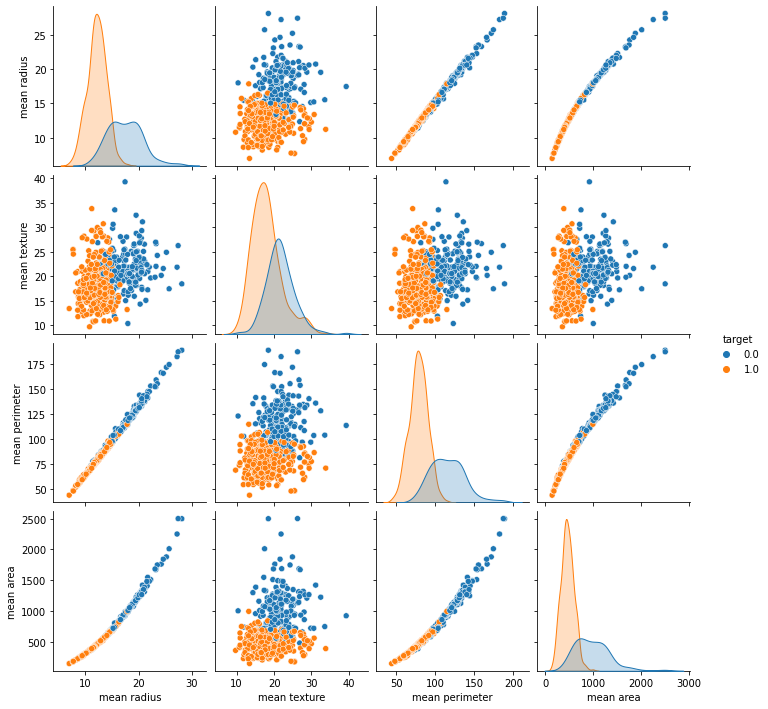

In [29]:
# representación de las muestras por clase, de acuerdo a las variables seleccionadas (las 4 primeras)
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'])

En las gráficas bidimensionales se aprecia la distribución de muestras (casos de cáncer) y su distribución de acuerdo con el valor de dos variables. En este caso particular se han tomado las cuatro primeras variables de las treinta que presenta el conjunto de datos. Las muestras pertenecientes a la clase “Maligno” (1.0) están coloreadas de naranja, mientras que las que pertenecen a la clase “Benigno” (0.0) lo están de color azul. En la representación, a simple vista, se aprecia que, en general, hay una diferencia clara entre las muestras de ambas clases en base al valor de las variables elegidas, a excepción
de la frontera entre ambas donde puede haber un mayor número de casos conflictivos que den lugar a errores puntuales en el proceso de clasificación. En general, los métodos de aprendizaje y clasificación empleados para este Dataset deberían generar un modelo que arrojase resultados por encima del 90 % dada una separación tan clara.

## Dependence between the target response and a set of input features of interest

<AxesSubplot:>

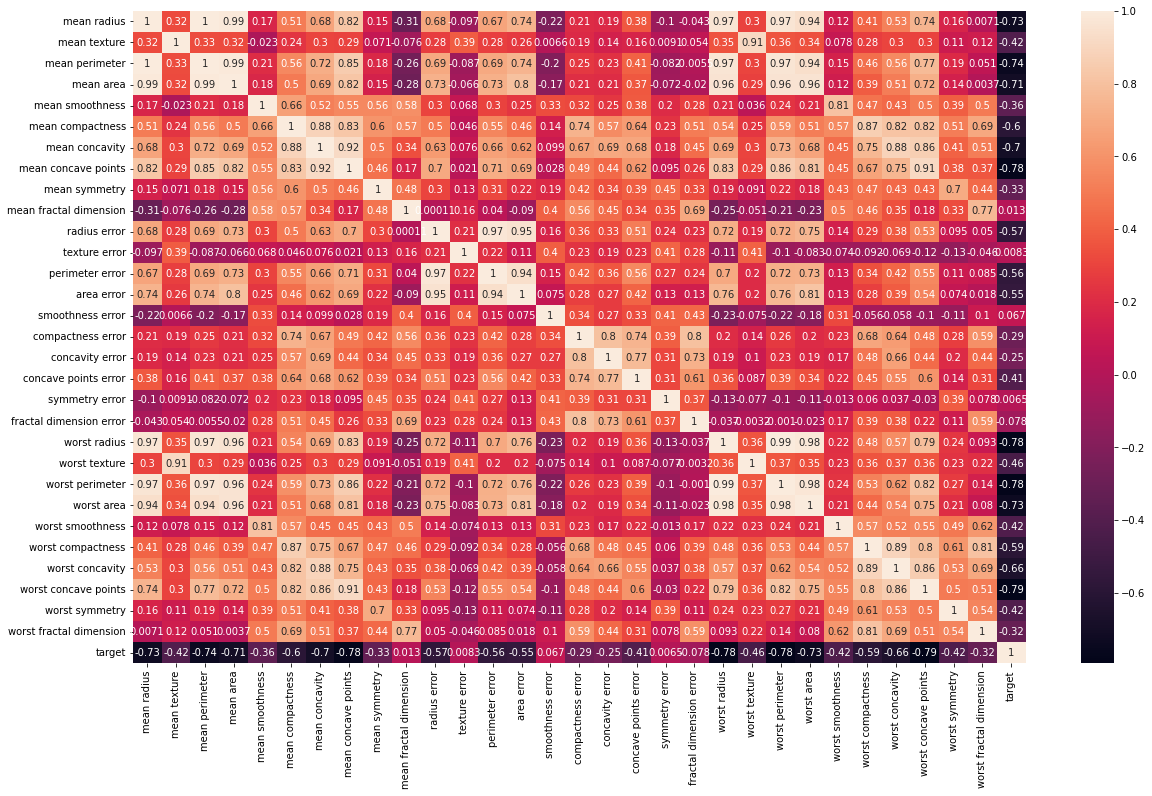

In [30]:
# mapa de correlación entre variables
plt.figure(figsize = (20, 12))
sns.heatmap(df.corr(), annot = True)

La correlación es un valor indicativo de la asociación entre dos variables.
Dos variables están asociadas cuando el valor de una nos da información acerca de la otra. El valor de correlación o magnitud está comprendido entre -1 y 1; cuando el valor de correlación entre dos variables es positivo, se denomina correlación positiva y las dos variables se correlacionan en el mismo sentido o sentido directo: si el valor de una variable crece o decrece, la otra variable lo hace con el mismo comportamiento. En cambio, cuando el valor de correlación es negativo, hablamos de una correlación negativa en donde las variables se correlacionan en sentido inverso: cuando el valor de una variable crece el de la otra decrece, y viceversa. Si la magnitud de correlación es 1 hablamos de correlación positiva perfecta y supone una determinación absoluta entre las dos variables (en sentido directo). En el caso de que el valor sea -1 hablamos de correlación negativa perfecta (en sentido inverso). Finalmente, si el valor es 0, se dice que las variables están incorrelacionadas, es decir, no se puede establecer ningún sentido en la covariación.

## Exploring dataset

1.0    357
0.0    212
Name: target, dtype: int64


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class distribution')

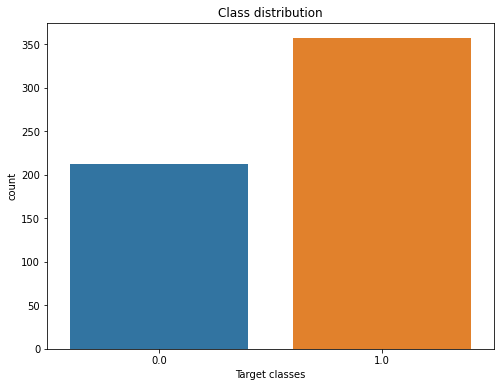

In [31]:
# cantidad de elementos de cada clase
print(df['target'].value_counts())

# representación gráfica de la cantidad de elementos de cada clase
plt.figure(figsize = (8, 6))
sns.countplot(df['target'])
plt.xlabel('Target classes')
plt.title('Class distribution')

## Load dataset as `Pandas DataFrame`

In [32]:
X, y = load_breast_cancer(return_X_y = True, as_frame = True)
print('CLASSES: ' + str(data.target_names))

CLASSES: ['malignant' 'benign']


## Splitting dataset into training and test data

In [33]:
# Splitting data into TRAINING and VALIDATION sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)
df_train, df_val = train_test_split(df, test_size = 0.25, random_state = None)

In [34]:
df_train.head(1).columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

# Building a Neural Network Model

### Documentation

> * [Machine Learning Glossary](https://developers.google.com/machine-learning/glossary?hl=en)

> * [Tutorial de problema de clasificación multiclase con Redes Neuronales usando Keras](https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/)

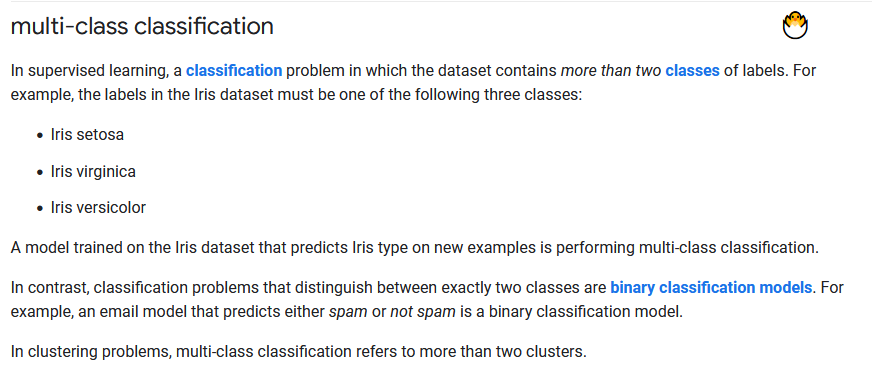

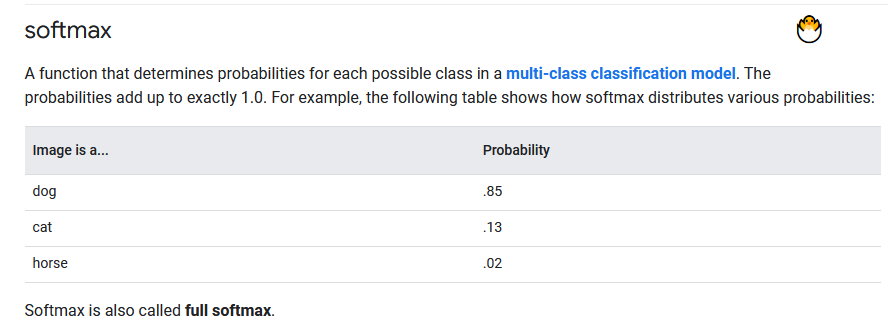

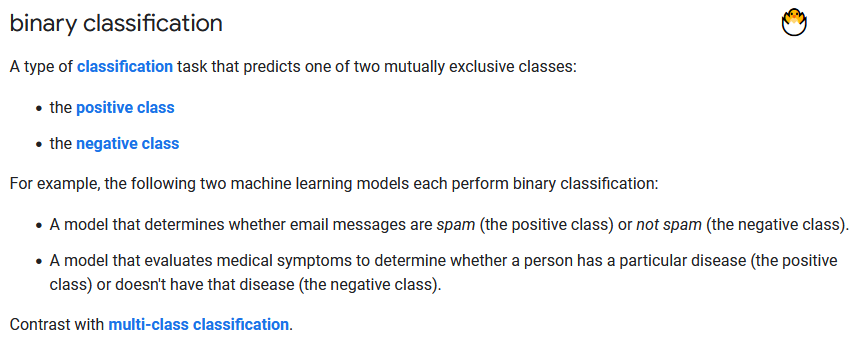

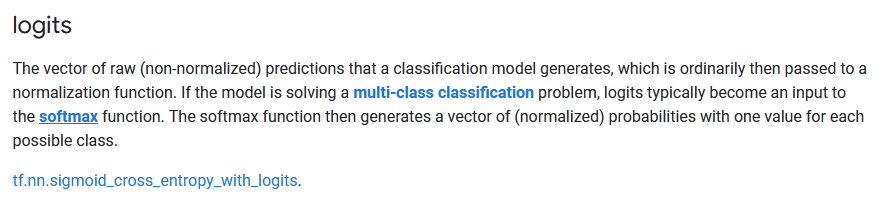

## Definir el optimizador del modelo (para Red Neuronal)

In [88]:
o1 = Adam()

### LearningRateScheduler

Decreasing learning rate over epochs

In [36]:
# Library required:
# -----------------
# from keras.callbacks import LearningRateScheduler

# Decreasing Neural Network learning rate over epochs
def step_decay(epoch):
    initial_lr = 0.01
    drop = 0.25
    epochs_drop = 128
    lr = initial_lr * (drop ** (epoch // epochs_drop))
    return lr

# create the LearningRateScheduler object
lr_scheduler = LearningRateScheduler(step_decay)

### Model Parameters

`Loss` ***Parameter***
> * [Keras Losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

`Accuracy Metrics` ***Parameter***
> * [Keras Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

`Initializer` ***Parameter***
> * [Keras initializers](https://www.tensorflow.org/api_docs/python/tf/keras/initializers)

`Activation` ***Parameter***
> * [Keras activations](https://www.tensorflow.org/api_docs/python/tf/keras/activations)

Setting model's parameters:
> * Accuracy Metric
> * Losses
> * Weight Initializer
> * Kernel Initializer
> * Epochs
> * Batch Size

In [121]:
# Keras initializer serialization / deserialization
i1 = HeNormal(seed=0) # ReLU initializer 
i2 = HeNormal(seed=1) # ReLU initializer
i3 = GlorotNormal(seed=0) # Tahn, Sigmoid initializer


# Built-in loss functions
l1 = 'binary_crossentropy'

# Keras metrics
m1 = 'binary_accuracy'
m2 = 'accuracy'

# Activation
a1 = 'relu'
a2 = 'sigmoid'
a3 = 'softmax'

# Epochs
epochs = 1000

# Batch size
batch_size = 48

# Number of perceptrons for each hidden layer
perceptrons = 60

# Cross-validation partitions
partitions = 10

### Baseline model function

> * [Keras Sequential Model](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)


In [122]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(
        Dense(perceptrons, 
        input_shape = (df_train[feature_names].shape[1],),
        # kernel_initializer = 'normal',
        kernel_initializer = i1,
        activation = a1
        ))
    model.add(Dense(perceptrons,
        # kernel_initializer='normal',
        kernel_initializer = i2,
        activation = a1
    ))
    model.add(Dense(1,
        # kernel_initializer='normal'
        kernel_initializer = i3,
        activation = a2
    ))
    # Compile model
    model.compile(
        loss = l1,
        optimizer = o1,
        metrics = [m1, m2]
    )
    return model

### Training Neural Network Classifier Model with Cross-Validation

In [190]:
# Computing time >> 9 mins. 0 secs.

# Entrenar el modelo
model = baseline_model()

outcomes = list()

cv = KFold(n_splits = partitions)
for train, test in cv.split(df_train):
    # ------------------------------------
    X_train = df_train.iloc[train]
    X_train = X_train.drop([target], axis = 1, inplace = False)
    X_test = df_train.iloc[test]
    X_test = X_test.drop([target], axis = 1, inplace = False)
    y_train = df_train[target].iloc[train]
    y_test = df_train[target].iloc[test]
    # ------------------------------------
    history = model.fit(
        X_train,
        y_train,
        validation_data = (X_test, y_test),
        epochs = epochs,
        batch_size = batch_size,
        verbose = 0,
        callbacks=[lr_scheduler]
    )
    # ------------------------------------
    _ = model.get_metrics_result()
    outcomes.append(_['binary_accuracy'].numpy()) 

#### Computing training model accuracy

In [197]:
print('Binary Accuracy: %.2f' % (mean(outcomes)*100))

Binary Accuracy: 94.62


In [ ]:
loss = mean(history.history['loss'])
print(f'LOSS: {loss}')
print(f'---------------------------------------------------------')
mse = mean(history.history['binary_accuracy'])
print(f'binary_accuracy: {mse}')
print(f'---------------------------------------------------------')
mae = mean(history.history['accuracy'])
print(f'accuracy: {mae}')

LOSS: 0.291568023532629
---------------------------------------------------------
binary_accuracy: 0.953619725883007
---------------------------------------------------------
accuracy: 0.953619725883007


In [202]:
_, BA, ACC = model.evaluate(X_val, y_val)
print('Standard Loss: %.2f' % (_))
print('Binary Accuracy: %.2f' % (BA*100))
print('Default Accuracy: %.2f' % (ACC*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.0445 - binary_accuracy: 0.9790 - accuracy: 0.9790
Standard Loss: 0.04
Binary Accuracy: 97.90
Default Accuracy: 97.90


### ...

---



### Building the model with training data and testing it with validation data 

In [203]:
# Computing time >> 49 secs.

# Entrenar el modelo
model = baseline_model()

# ------------------------------------
X_train = df_train.drop([target], axis = 1, inplace = False)
y_train = df_train[target]
X_val = df_val.drop([target], axis = 1, inplace = False)
y_val = df_val[target]
# ------------------------------------

history = model.fit(
    X_train,
    y_train,
    validation_data = (X_val, y_val),
    epochs = epochs,
    batch_size = batch_size,
    verbose = 0,
    callbacks = [lr_scheduler]
)

#### Computing validation model accuracy

From model metrics

In [204]:
for keys, values in model.get_metrics_result().items():
    print(f'---------------------------------------------------------')
    print(f'Metric: {keys}')
    print(f'Metric: {values}')
    print(f'---------------------------------------------------------')

---------------------------------------------------------
Metric: loss
Metric: 0.06703630089759827
---------------------------------------------------------
---------------------------------------------------------
Metric: binary_accuracy
Metric: 0.9790209531784058
---------------------------------------------------------
---------------------------------------------------------
Metric: accuracy
Metric: 0.9790209531784058
---------------------------------------------------------


From model training testing

In [206]:
loss = mean(history.history['loss'])
print(f'LOSS: {loss}')
print(f'---------------------------------------------------------')
mse = mean(history.history['binary_accuracy'])
print(f'binary_accuracy: {mse}')
print(f'---------------------------------------------------------')
mae = mean(history.history['accuracy'])
print(f'accuracy: {mae}')

LOSS: 0.291568023532629
---------------------------------------------------------
binary_accuracy: 0.953619725883007
---------------------------------------------------------
accuracy: 0.953619725883007


#### Getting predictions with validation data

In [207]:
y_pred = model.predict(
    X_val,
    batch_size = batch_size,
    verbose='auto',
    steps = None,
    callbacks = [lr_scheduler],
    max_queue_size = 10,
    workers = 1,
    use_multiprocessing = False
)

3/3 [==============================] - 0s 3ms/step


#### Computing prediction accuracy

In [208]:
y_pred_bool = [x[0] >= 0.5 for x in y_pred]
y_val_bool = (y_val >= 0.5).to_numpy()

In [209]:
print(y_pred_bool[:5])
print(f'-----------')
print(y_val_bool[:5])

[True, True, False, False, False]
-----------
[ True  True False False False]


In [210]:
for keys, values in classification_report(y_val_bool, y_pred_bool, output_dict=True).items():
    if keys == 'True': print(f'>> {keys}\u0009\u0009Score: {values}')
    else: print(f'>> {keys}\u0009Score: {values}')

>> False	Score: {'precision': 0.9803921568627451, 'recall': 0.9615384615384616, 'f1-score': 0.970873786407767, 'support': 52}
>> True		Score: {'precision': 0.9782608695652174, 'recall': 0.989010989010989, 'f1-score': 0.9836065573770493, 'support': 91}
>> accuracy	Score: 0.9790209790209791
>> macro avg	Score: {'precision': 0.9793265132139812, 'recall': 0.9752747252747254, 'f1-score': 0.9772401718924082, 'support': 143}
>> weighted avg	Score: {'precision': 0.9790358831279546, 'recall': 0.9790209790209791, 'f1-score': 0.9789764588427649, 'support': 143}


## Displaying data

### Accuracy plot

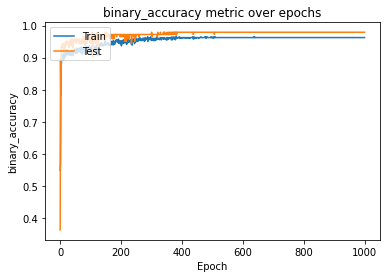

In [214]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('binary_accuracy metric over epochs')
plt.ylabel('binary_accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

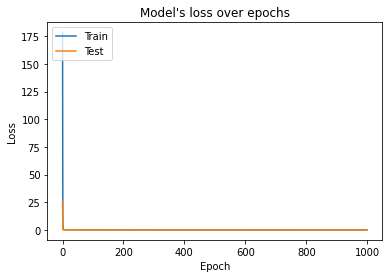

In [212]:
# Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's loss over epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

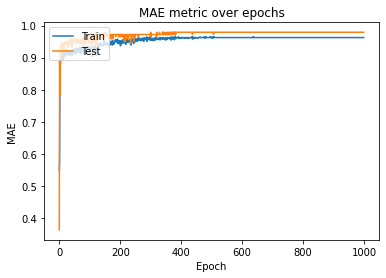

In [215]:
# Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("MAE metric over epochs")
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Model structure

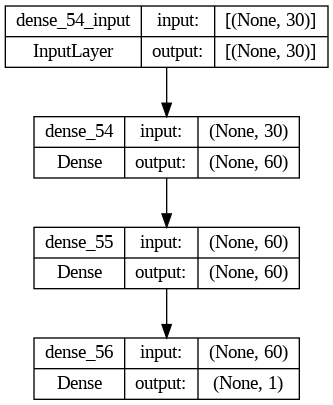

In [216]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

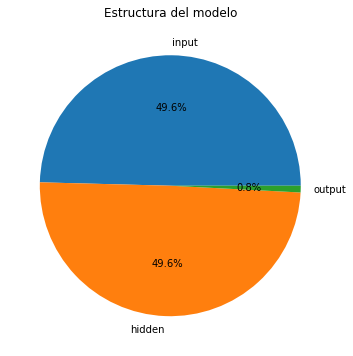

In [217]:
import matplotlib.pyplot as plt

# Obtener la estructura del modelo
model_layers = [layer.output for layer in model.layers]
# layer_names = [layer.name for layer in model.layers]

layer_names = ['input', 'hidden', 'output']

# Crear el diagrama
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Estructura del modelo')
ax.axis('off')
_ = plt.pie([layer.shape[-1] for layer in model_layers], labels=layer_names, autopct='%1.1f%%')
plt.show()

## Outcomes:


---

PARAMETERS

> * Cross_validation = `10`

> * Learning_rate = `0.01`

> * Initial_lr = `0.01`

> * Drop = `0.25`

> * Epochs_drop = `128`

> * First layer (input) = `30` 

> * Second layer (hidden) = `60` (Act: 'relu', Init: 'HeUniform')

> * Third layer (hidden) = `60` (Act: 'relu', Init: 'HeUniform')

> * Output layer = `1` ('sigmoid', 'GlorotNormal')

> * Batch size = `48`

> * Epochs = `1000`

> * Loss function = `binary_crossentropy`

> * Metric = `binary_accuracy` (BA) and `accuracy` (ACC)

---

***SCORE LIST***

```python
---------------------------------------------------------
LOSS:   0.0545
---------------------------------------------------------
BA:    0.9790
---------------------------------------------------------
ACC:   97.90%
---------------------------------------------------------
```

## Summing-up

Se ha optimizado el modelo de clasificación de la siguiente forma:

> * Aumentado el número de perceptrones de 30 a 60

> * Se ha añadido una nueva capa oculta o intermedia con 60 perceptrones

> * Se ha definido una función de activación distinta para las capas intermedias/entrada (HeNormal) y para la capa de salida (Glorot)

> * Se ha definido un descenso de gradiente en la curva de aprendizaje (para evitar el sobre-entrenamiento)

> * Se ha aumentado el número de épocas de entrenamiento hasta 1000

> * Se ha dado una semilla de aleatoriedad distinta para cada función de activación de pesos de cada capa

**CALIDAD DEL MODELO**

> * Se han entrenado dos modelos con dos aproximaciones distintas:
>> * Uno utilizando los datos del entrenamiento para realizar el entrenamiento y el **test** mediante la técnica de **validación cruzada** (`K-Fold`) Posteriormente se usaron los datos de validación para calcular la precisión del modelo (función `model.evalutate()`)
>> * El segundo se ha entrenado con un conjunto de datos (`df_train`) y se ha validado con un conjunto distinto (`df_val`) de una vez sin realizar validación cruzada

> * Los dos modelos obtienen la **misma puntuación**

> * Dicha puntuación final es muy elevada. 

> * El modelo se comporta excelentemente cuando se introducen datos nuevos (con los que no ha sido entrenado, `df_val`) y obtiene un `scoring` muy alto (> 90%)

> * También se ha medido la precisión del modelo comparando los datos predichos (obtenidos previamente) con los datos verdaderos de la columna objetivo (función `classification_report`)





---



---

# Warehouse

## Building a Linear Model

In [ ]:
classifier = svm.SVC(kernel = 'linear', C = 0.01)
model = classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# 'Confusion Matrix
cm_data = confusion_matrix(y_test, y_pred, labels = np.unique(y_test))

print('Confusion Matrix')
print(cm_data)
print('-----------------------------------------------------------------')

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = np.unique(y_test))
ax = plt.subplot()
sns.heatmap(cm, annot = True, fmt = 'g', ax = ax, cmap = 'Greens');
# annot=True to annotate cells, ftm=’g’ to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted values')
ax.set_ylabel('True data')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])
plt.show()

In [ ]:
# Another way to plot 'Confusion Matrix'
class_names = data.target_names
title = 'Confusion Matrix'
disp = ConfusionMatrixDisplay.from_estimator(
    classifier, X_test, y_test,
    display_labels = class_names,
    cmap = plt.cm.Blues
)
disp.ax_.set_title(title)
plt.show()

In [ ]:
# Getting the model's prediction accuracy
print('Accuracy:\u0009\u0009' + str(accuracy_score(y_test, y_pred)))
print('Precision:\u0009\u0009' + \
str(precision_score(y_test, y_pred, labels = [1, 0], pos_label = 1, average = 'binary')))
print('Recall:\u0009\u0009\u0009' + \
str(recall_score(y_test, y_pred, labels = [1, 0], pos_label = 1, average = 'binary')))
print('Logarithm Loss:\u0009\u0009' + str(log_loss(y_test, y_pred)))
print('F1-score (weighted):\u0009' + str(f1_score(y_test, y_pred, average = 'weighted')))

In [ ]:
# The roc curve requires either the probabilities or the non-thresholded 
# decision values from the estimator. Since the logistic regression provides 
# a decision function, we will use it to plot the roc curve

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()

En la gráfica se puede apreciar como la curva se acerca rápidamente al
área de verdaderos positivos y el área AUC = 0.98 (98 % de probabilidad de que
un ejemplo sea correctamente clasificado), ambos indicativos del buen funcionamiento del clasificador elegido para el Dataset utilizado como ejemplo. Tal como se mencionó anteriormente, para una correcta evaluación del modelo se recomienda un mayor número de iteraciones cubriendo en la mayor medida de lo posible el espacio de muestras. Para ello se puede recurrir a una estructura iterativa (bucle) que permita la repetición de los últimos pasos indicados: división aleatoria del conjunto inicial de ejemplos y predicción, con posterior aplicación de métricas. O, también, emplear la validación cruzada.



---



---

## Undefined cells

Matriz de confusión clasificación binaria

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_real = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
y_pred = [1, 1, 1, 1, 0, 1, 1, 0, 0, 0]

cm = confusion_matrix(y_real, y_pred)
print (cm)

# creación de figura
ax= plt.subplot()
sns.heatmap(cm, annot = True, fmt = 'g', ax = ax, cmap = 'Greens');
# annot=True to annotate cells, ftm=’g’ to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Valores Predichos')
ax.set_ylabel('Valores Reales')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])
plt.show()

Matriz de confusión clasificación multiclase

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# importación de iris dataset
iris = datasets.load_iris()

# conjunto de ejemplos
X = iris.data

# clases
y = iris.target

# nombre de las clases
class_names = iris.target_names

# división del dataSet en dos cojuntos: entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# usamos como clasificador Support Vector Classification
classifier = svm.SVC(kernel = 'linear', C = 0.01).fit(X_train, y_train)
np.set_printoptions(precision = 2)

# dos gráficas, datos sin normalizar y normalizados.
titles_options = [('Confusion matrix, without normalization', None), ('Normalized confusion matrix', 'true'), ]
for title, normalize in titles_options:
  disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels = class_names, cmap = plt.cm.Blues, normalize = normalize,)
  disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

Precisión, accuracy

In [ ]:
# accuracy: exactitud
from sklearn.metrics import accuracy_score

y_pred = ['A','A','A','A','A','A','A','A','B','A','A','B','B','B','B','B','B','B','B','B']
y_true = ['A','A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B','B','B','B']

print(accuracy_score(y_true, y_pred))

In [ ]:
# precision: precisión
from sklearn.metrics import precision_score

print(precision_score(y_true, y_pred, labels = ['A', 'B'], pos_label = 'A', average = 'binary'))
print(precision_score(y_true, y_pred, labels = ['A', 'B'], pos_label = 'B', average = 'binary'))

In [ ]:
# recall: exhaustividad
from sklearn.metrics import recall_score

print(recall_score(y_true, y_pred, labels = ['A', 'B'], pos_label = 'A', average = 'binary'))
print(recall_score(y_true, y_pred, labels = ['A', 'B'], pos_label = 'B', average = 'binary'))

In [ ]:
# media ponderada de la precisión y la exhaustividad
from sklearn.metrics import f1_score

print(f1_score(y_true, y_pred, average = 'weighted'))

**sklearn.metrics.classification_report**


> * [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn-metrics-classification-report)

In [ ]:
# informe
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, labels=['A', 'B']))